# Car Price Prediction and Analysis

## Table of Contents

- [Introduction](#introduction)
- [Phase 1: Project Overview](#phase-1-project-overview)
- [Phase 2: Data Collection](#phase-2-data-collection)
- [Phase 3: Data Preprocessing](#phase-3-data-preprocessing)
- [Phase 4: Exploratory Data Analysis (EDA)](#phase-4-exploratory-data-analysis-eda)
- [Phase 5: Feature Engineering](#phase-5-feature-engineering)
- [Phase 6: Model Development](#phase-6-model-development)
- [Phase 7: Model Evaluation](#phase-7-model-evaluation)
- [Phase 8: Hyperparameter Tuning](#phase-8-hyperparameter-tuning)
- [Phase 9: Model Interpretation](#phase-9-model-interpretation)
- [Phase 10: Model Persistence](#phase-10-model-persistence)
- [Final Summary and Recommendations](#final-summary-and-recommendations)
- [Conclusion](#conclusion)

<a id="introduction"></a>

## Introduction

This documentation outlines the various phases of the Car Price Prediction project, which aims to develop and evaluate machine learning models to predict car prices based on relevant features. The project involves data preprocessing, exploratory data analysis (EDA), feature engineering, model development, and evaluation.

<a id="phase-1-project-overview"></a>

## Phase 1: Project Overview

The Car Price Prediction project involves building machine learning models to predict car prices based on various features. The project follows a systematic approach, including data preprocessing, exploratory data analysis, feature engineering, model development, and evaluation.

<a id="phase-2-data-collection"></a>

## Phase 2: Data Collection

The sales team has pulled some data from the website listings from the last 6 months. All cars listed in this data were sold at the price listed. </br>
The dataset contains information about various car listings, including features such as mileage, fuel type, transmission, and more.

You can download the raw data from [here](https://s3.amazonaws.com/talent-assets.datacamp.com/toyota.csv)

<a id="phase-3-data-preprocessing"></a>

## Phase 3: Data Preprocessing

Data preprocessing is a critical step to ensure the dataset is suitable for analysis and modeling. The following preprocessing steps were performed:

1. **Handling Missing Values:** Missing values were identified and handled using appropriate techniques such as imputation or removal.

2. **Data Types Validation:** Data types were validated to ensure they match the expected formats.

In [2]:
# Import necessary libraries and modules

# Import the 'pandas' library and use the alias 'pd' for data manipulation and analysis
import pandas as pd

# Import the 'StandardScaler' class from the 'sklearn.preprocessing' module for feature scaling
from sklearn.preprocessing import StandardScaler

# Import various regression algorithms from different modules
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Import functions for data splitting and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'joblib' module for saving and loading models
import joblib

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/Julia/OneDrive/Documentos/fit4kz/projects/samplePracticalExam/usedCarSales/rawData/toyota.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Let's break down the information step by step:

1. **DataFrame Overview**: The result you've shown is a description of a DataFrame, which is a fundamental data structure used in data analysis. It's like a table in a spreadsheet, where each row represents a separate entry (in this case, a car), and each column represents a different attribute or characteristic of that entry.

2. **Size of the DataFrame**:
   - The DataFrame contains 6738 entries (rows).
   - The entries are indexed from 0 to 6737, giving each entry a unique identifier.

3. **Columns and Data Types**:
   - The DataFrame has 9 columns in total.
   - Each column has a specific name and contains data related to a particular aspect of the cars.

4. **Column Information**:
   - `model`: This column contains the model of each car. It's represented as text (object data type).
   - `year`: This column represents the manufacturing year of each car. It's represented as an integer (int64 data type).
   - `price`: This column contains the price of each car. It's represented as an integer (int64 data type).
   - `transmission`: This column represents the type of transmission each car has (e.g., automatic or manual). It's represented as text (object data type).
   - `mileage`: This column contains the mileage (distance traveled) of each car. It's represented as an integer (int64 data type).
   - `fuelType`: This column represents the type of fuel each car uses (e.g., gasoline, diesel). It's represented as text (object data type).
   - `tax`: This column contains the tax associated with each car. It's represented as an integer (int64 data type).
   - `mpg`: This column represents the miles per gallon (fuel efficiency) of each car. It's represented as a floating-point number (float64 data type).
   - `engineSize`: This column contains the size of the engine of each car. It's represented as a floating-point number (float64 data type).

In summary, this DataFrame contains information about 6738 cars, including details like their models, manufacturing years, prices, transmission types, mileage, fuel types, taxes, fuel efficiency, and engine sizes.

In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


The table provides statistical summaries of various attributes of the cars in the dataset. Here's what each part of the table means:

1. **count**: This row indicates the number of available data points for each attribute. It tells us how many cars have values recorded for each specific attribute.

2. **mean**: This row represents the average (mean) value of each attribute across all the cars in the dataset. For example, the average year of the cars is approximately 2016.75, the average price is about $12,522, the average mileage is around 22,857 miles, and so on.

3. **std**: The term "std" stands for standard deviation. This row shows the measure of how spread out or dispersed the values are from the mean. A higher standard deviation indicates more variability in the data. For example, the standard deviation for the price column is approximately $6,345, indicating that the car prices vary quite a bit from the average.

4. **min**: This row provides the minimum value for each attribute. For instance, the earliest manufacturing year in the dataset is 1998, the lowest price is $850, the smallest mileage value is 2 miles, and so on.

5. **25% (percentile)**: This row represents the value below which 25% of the data falls. It's also known as the first quartile or lower quartile. For example, 25% of the cars have a manufacturing year of 2016 or earlier, 25% have prices less than $8,290, and so on.

6. **50% (percentile)**: This row corresponds to the median value, which is the middle value when the data is sorted. Half of the data points are below this value, and half are above. For instance, the median year is 2017, the median price is $10,795, and so on.

7. **75% (percentile)**: This row represents the value below which 75% of the data falls. It's also known as the third quartile or upper quartile. For example, 75% of the cars have a manufacturing year of 2018 or earlier, 75% have prices below $14,995, and so on.

8. **max**: This row provides the maximum value for each attribute. For instance, the latest manufacturing year in the dataset is 2020, the highest price is $59,995, the maximum mileage value is 174,419 miles, and so on.

In summary, this table offers a statistical overview of key attributes of the cars in the dataset, helping us understand the typical range, distribution, and central tendencies of these attributes.

In [6]:
# Function to Check Numeric Format

# Define a function named 'is_numeric' that takes a parameter 'value'
def is_numeric(value):
    """
    Check if a given value is in numeric format (either integer or float).
    
    Parameters:
    value (int or float): The value to be checked.
    
    Returns:
    bool: True if the value is numeric, False otherwise.
    """
    # Check if the 'value' is an instance of either 'int' or 'float' data types
    return isinstance(value, (int, float))

This function can be handy when you need to determine whether a value is suitable for mathematical operations or if you want to perform specific actions based on its numeric nature.

In [7]:
# Model
# Get the unique values from the 'model' column in the 'data' dataset.
unique_models = data['model'].unique()

# Print out the list of unique models.
print("Unique Models:", unique_models)

# Counts the occurrences of each unique value
data['model'].value_counts()

Unique Models: [' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


model
 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: count, dtype: int64

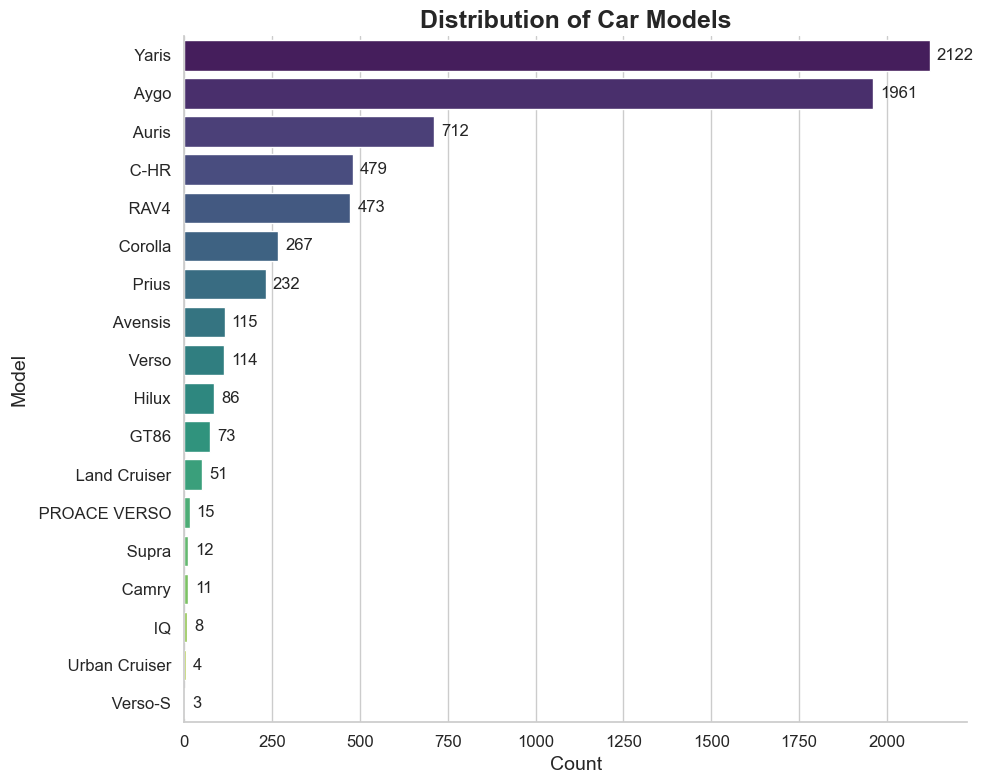

In [8]:
# Set the style of the plot
sns.set(style="whitegrid")

# Setting the figure size for the plot
plt.figure(figsize=(10, 8))

# Creating a count plot to visualize the distribution of car models
# The 'y' parameter specifies that the models will be plotted on the y-axis
# The 'order' parameter sorts the bars based on the counts of each model in descending order
ax = sns.countplot(data=data, y='model', order=data['model'].value_counts().index, palette="viridis")

# Adding a title with custom font size and weight
plt.title('Distribution of Car Models', fontsize=18, fontweight='bold')

# Adding labels to the x and y axes with custom font size
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Customize tick parameters
ax.tick_params(axis='both', labelsize=12)

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

# Remove spines (borders) of the plot
sns.despine()

# Display a more polished plot
plt.tight_layout()

# Display the plot with improved aesthetics
plt.show()

In [9]:
# Year Analysis

# Filtering data for years between 1998 and 2020
year = data[(data['year'] >= 1998) & (data['year'] <= 2020)]

# Extracting the 'year' column from the original data
year_original = data['year']

# Calculating the number of records in the filtered 'year' subset
length_year = len(year)

# Calculating the number of records in the original 'year' subset
length_year_original = len(year_original)

# Displaying the number of records in each subset
print("Number of records in year subset:", length_year)
print("Number of records in original year subset:", length_year_original)

# Comparing the lengths of the two subsets
if length_year == length_year_original:
    print("The amount of data is the same between the two subsets.")
else:
    print("The amount of data is different between the two subsets.")

# Applying the 'is_numeric' function to the 'year' column
numeric_year = data['year'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'year' column:")
print("Validation Results for Numeric Format in 'year' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'year' column
print(numeric_year.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records in year subset: 6738
Number of records in original year subset: 6738
The amount of data is the same between the two subsets.
--------------------------------------------------
Validation of Numeric Format for 'year' column:
Validation Results for Numeric Format in 'year' Column:
year
True    6738
Name: count, dtype: int64
--------------------------------------------------


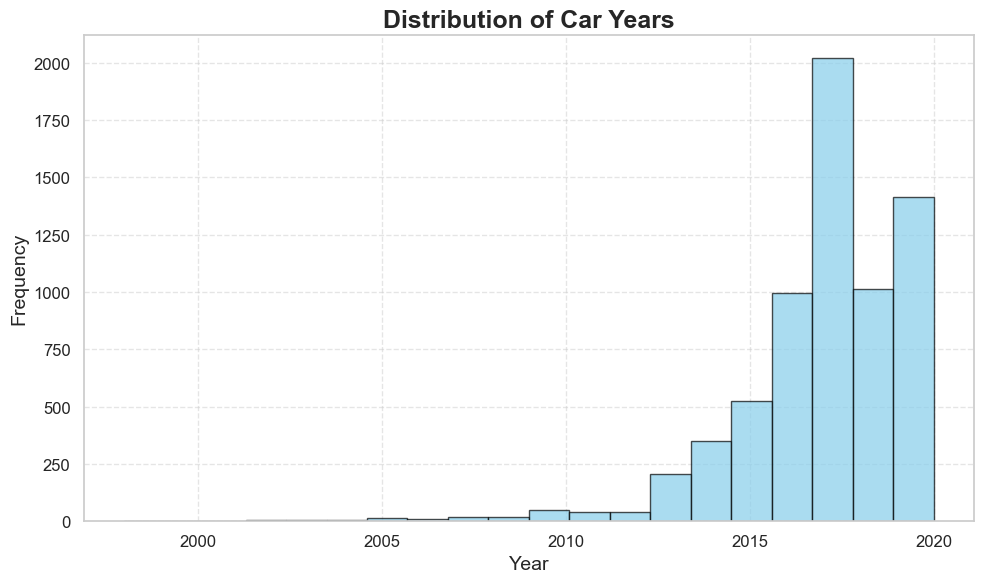

In [10]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of car years
plt.hist(data['year'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of Car Years', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Filtering data for non-negative mileage values
mileage = data[data['mileage'] >= 0]

# Extracting the 'year' column from the original data
mileage_original = data['year']

# Calculating the number of records in the filtered 'mileage' subset
length_mileage = len(mileage)

# Calculating the number of records in the original 'year' subset (a mistake here, should be 'mileage_original')
length_mileage_original = len(mileage_original)

# Displaying the number of records in each subset
print("Number of records in mileage subset:", length_mileage)
print("Number of records in original mileage subset:", length_mileage_original)

# Comparing the lengths of the two subsets
if length_mileage == length_mileage_original:
    print("The amount of data is the same between the two subsets.")
else:
    print("The amount of data is different between the two subsets.")

# Applying the 'is_numeric' function to the 'mileage' column
numeric_mileage = data['mileage'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'mileage' column:")
print("Validation Results for Numeric Format in 'mileage' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'mileage' column
print(numeric_mileage.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records in mileage subset: 6738
Number of records in original mileage subset: 6738
The amount of data is the same between the two subsets.
--------------------------------------------------
Validation of Numeric Format for 'mileage' column:
Validation Results for Numeric Format in 'mileage' Column:
mileage
True    6738
Name: count, dtype: int64
--------------------------------------------------


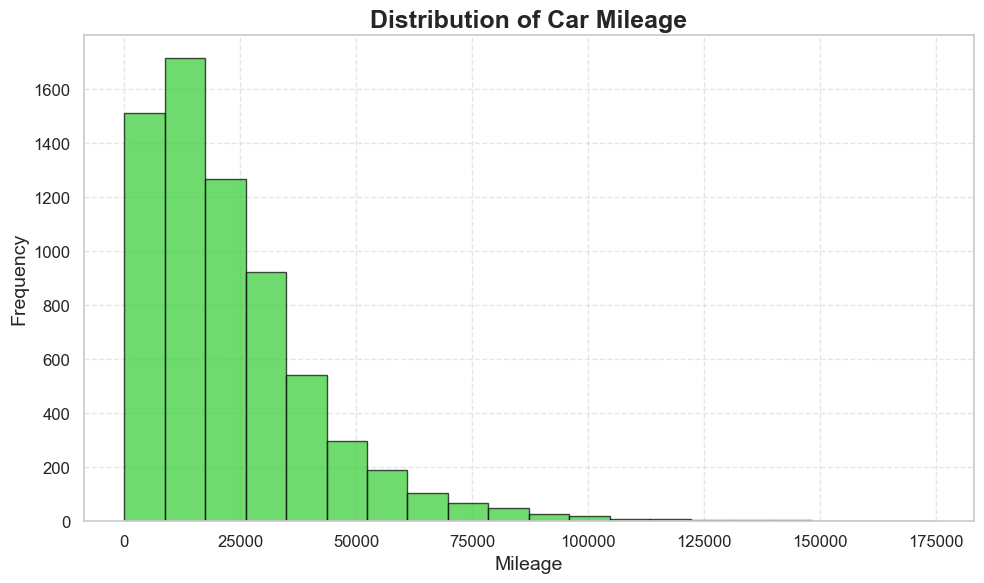

In [12]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of car mileage
plt.hist(data['mileage'], bins=20, color='limegreen', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of Car Mileage', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Filtering data for positive price values
price = data[data['price'] > 0]

# Extracting the 'price' column from the original data
price_original = data['price']

# Calculating the number of records in the filtered 'price' subset
length_price = len(price)

# Calculating the number of records in the original 'price' subset
length_price_original = len(price_original)

# Displaying the number of records in each subset
print("Number of records in price subset:", length_price)
print("Number of records in original price subset:", length_price_original)

# Comparing the lengths of the two subsets
if length_price == length_price_original:
    print("The amount of data is the same between the two subsets.")
else:
    print("The amount of data is different between the two subsets.")

# Applying the 'is_numeric' function to the 'price' column
numeric_price = data['price'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'price' column:")
print("Validation Results for Numeric Format in 'price' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'price' column
print(numeric_price.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records in price subset: 6738
Number of records in original price subset: 6738
The amount of data is the same between the two subsets.
--------------------------------------------------
Validation of Numeric Format for 'price' column:
Validation Results for Numeric Format in 'price' Column:
price
True    6738
Name: count, dtype: int64
--------------------------------------------------


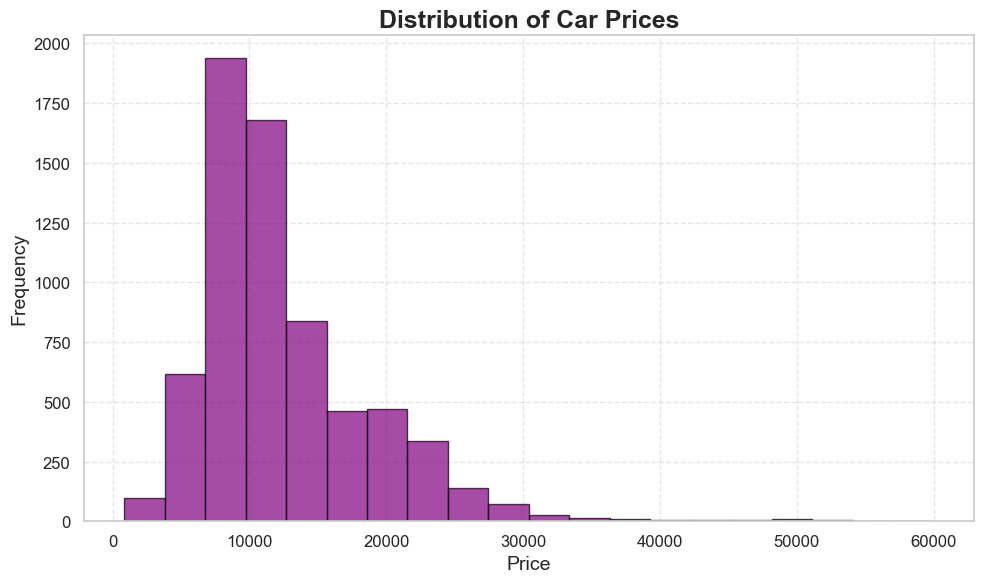

In [14]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of car prices
plt.hist(data['price'], bins=20, color='purple', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of Car Prices', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Display the counts of each transmission type
print(data['transmission'].value_counts())

# Print a visual separator
print("-" * 50)

# Display the total count of transmission types
print('Total counts:', data['transmission'].value_counts().sum())

transmission
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: count, dtype: int64
--------------------------------------------------
Total counts: 6738


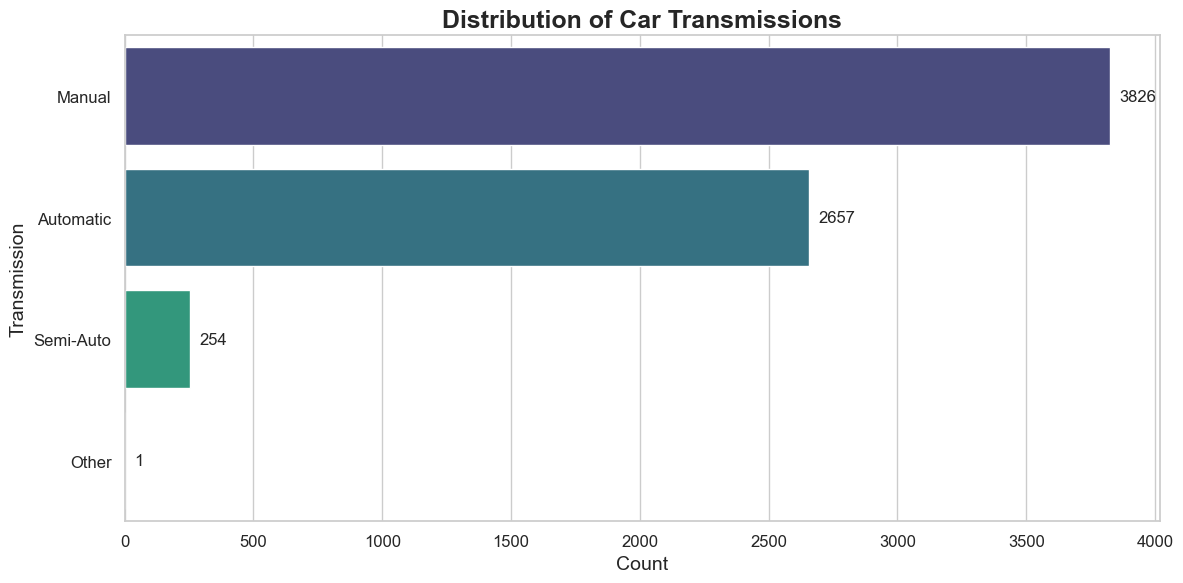

In [16]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a count plot to visualize the distribution of car transmissions
ax = sns.countplot(data=data, y='transmission', order=data['transmission'].value_counts().index, palette='viridis')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_width() + 10, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

# Add a title with custom font size and weight
plt.title('Distribution of Car Transmissions', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Count', fontsize=14)
plt.ylabel('Transmission', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Filter data for records with negative mileage
negative_mileage = data[data['mileage'] < 0]

# Display the number of records with negative mileage
print("Number of records with negative mileage:", len(negative_mileage))

# Applying the 'is_numeric' function to the 'mileage' column
numeric_mileage = data['mileage'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'mileage' column:")
print("Validation Results for Numeric Format in 'mileage' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'mileage' column
print(numeric_mileage.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records with negative mileage: 0
--------------------------------------------------
Validation of Numeric Format for 'mileage' column:
Validation Results for Numeric Format in 'mileage' Column:
mileage
True    6738
Name: count, dtype: int64
--------------------------------------------------


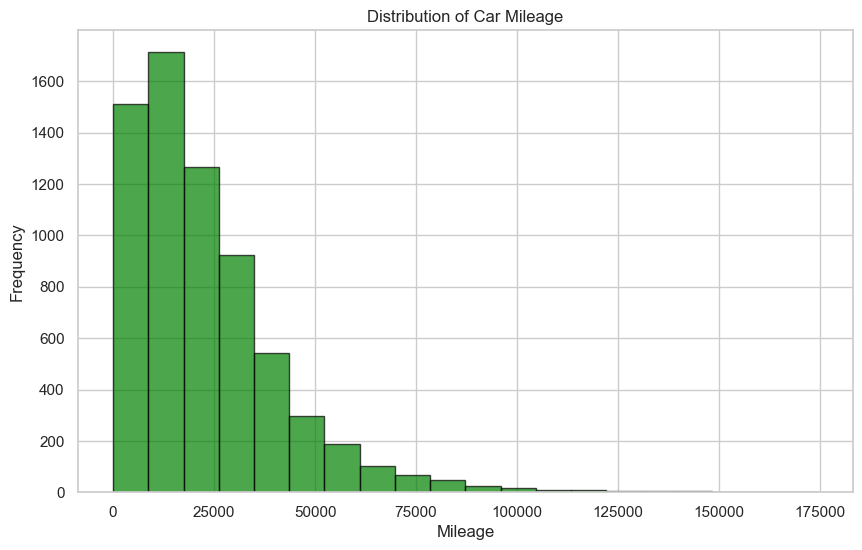

In [18]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of car mileage
plt.hist(data['mileage'], bins=20, color='green', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [19]:
# Display the counts of each fuel type
print(data['fuelType'].value_counts())

# Print a separator for clarity
print("-" * 50)

# Display the total count of fuel types
total_fuel_counts = data['fuelType'].value_counts().sum()
print("Total Counts:", total_fuel_counts)

fuelType
Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: count, dtype: int64
--------------------------------------------------
Total Counts: 6738


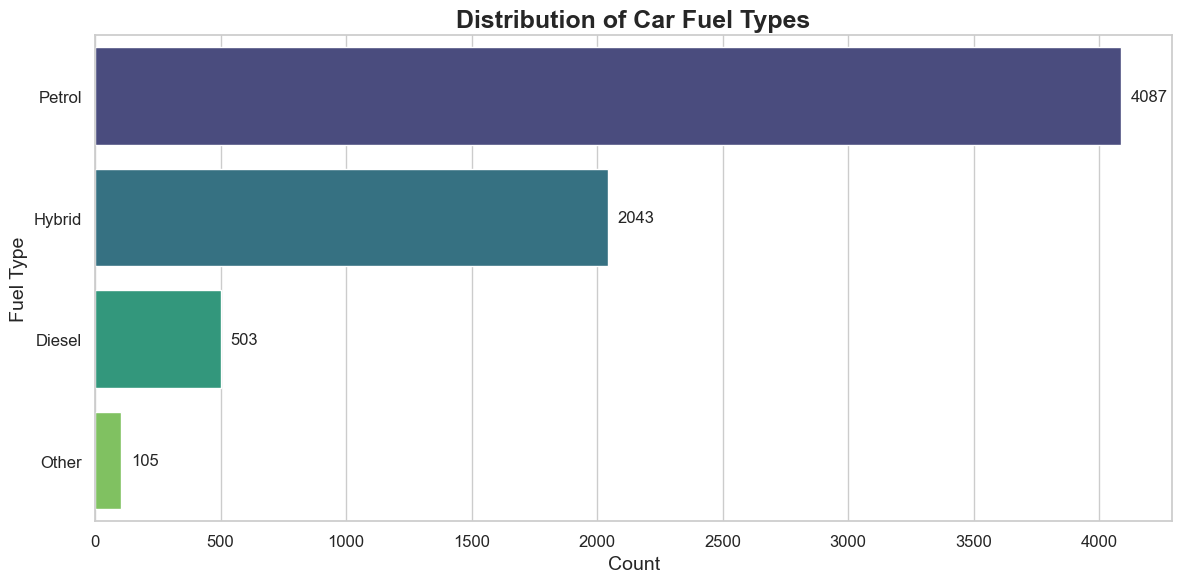

In [20]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a count plot to visualize the distribution of car fuel types
ax = sns.countplot(data=data, y='fuelType', order=data['fuelType'].value_counts().index, palette='viridis')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_width() + 10, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

# Add a title with custom font size and weight
plt.title('Distribution of Car Fuel Types', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Count', fontsize=14)
plt.ylabel('Fuel Type', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Filtering data for non-negative tax values
tax = data[data['tax'] >= 0]

# Extracting the 'tax' column from the original data
tax_original = data['tax']

# Calculating the number of records in the filtered 'tax' subset
length_tax = len(tax)

# Calculating the number of records in the original 'tax' subset
length_tax_original = len(tax_original)

# Displaying the number of records in each subset
print("Number of records in tax subset:", length_tax)
print("Number of records in original tax subset:", length_tax_original)

# Comparing the lengths of the two subsets
if length_tax == length_tax_original:
    print("The amount of data is the same between the two subsets.")
else:
    print("The amount of data is different between the two subsets.")

# Applying the 'is_numeric' function to the 'tax' column
numeric_tax = data['tax'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'tax' column:")
print("Validation Results for Numeric Format in 'tax' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'tax' column
print(numeric_tax.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records in tax subset: 6738
Number of records in original tax subset: 6738
The amount of data is the same between the two subsets.
--------------------------------------------------
Validation of Numeric Format for 'tax' column:
Validation Results for Numeric Format in 'tax' Column:
tax
True    6738
Name: count, dtype: int64
--------------------------------------------------


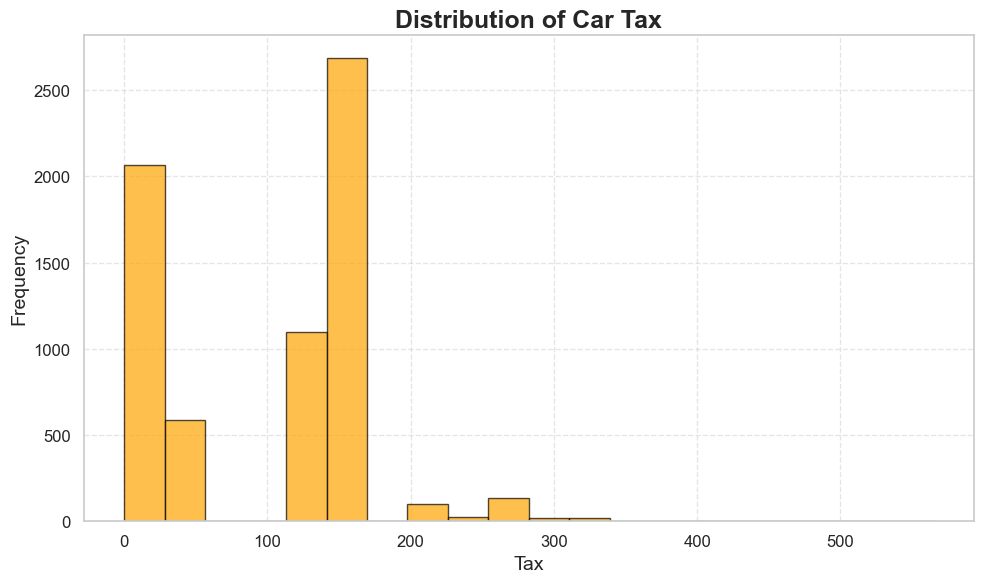

In [22]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of car tax amounts
plt.hist(data['tax'], bins=20, color='orange', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of Car Tax', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Tax', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Filtering data for non-negative MPG values
mpg = data[data['mpg'] >= 0]

# Extracting the 'mpg' column from the original data
mpg_original = data['mpg']

# Calculating the number of records in the filtered 'mpg' subset
length_mpg = len(mpg)

# Calculating the number of records in the original 'mpg' subset
length_mpg_original = len(mpg_original)

# Displaying the number of records in each subset
print("Number of records in mpg subset:", length_mpg)
print("Number of records in original mpg subset:", length_mpg_original)

# Comparing the lengths of the two subsets
if length_mpg == length_mpg_original:
    print("The amount of data is the same between the two subsets.")
else:
    print("The amount of data is different between the two subsets.")

# Applying the 'is_numeric' function to the 'mpg' column
numeric_mpg = data['mpg'].apply(is_numeric)

# Displaying the results of the numeric format validation
print("-" * 50)
print("Validation of Numeric Format for 'mpg' column:")
print("Validation Results for Numeric Format in 'mpg' Column:")

# Counting the occurrences of numeric and non-numeric values in the 'mpg' column
print(numeric_mpg.value_counts())

# Printing a visual separator
print("-" * 50)

Number of records in mpg subset: 6738
Number of records in original mpg subset: 6738
The amount of data is the same between the two subsets.
--------------------------------------------------
Validation of Numeric Format for 'mpg' column:
Validation Results for Numeric Format in 'mpg' Column:
mpg
True    6738
Name: count, dtype: int64
--------------------------------------------------


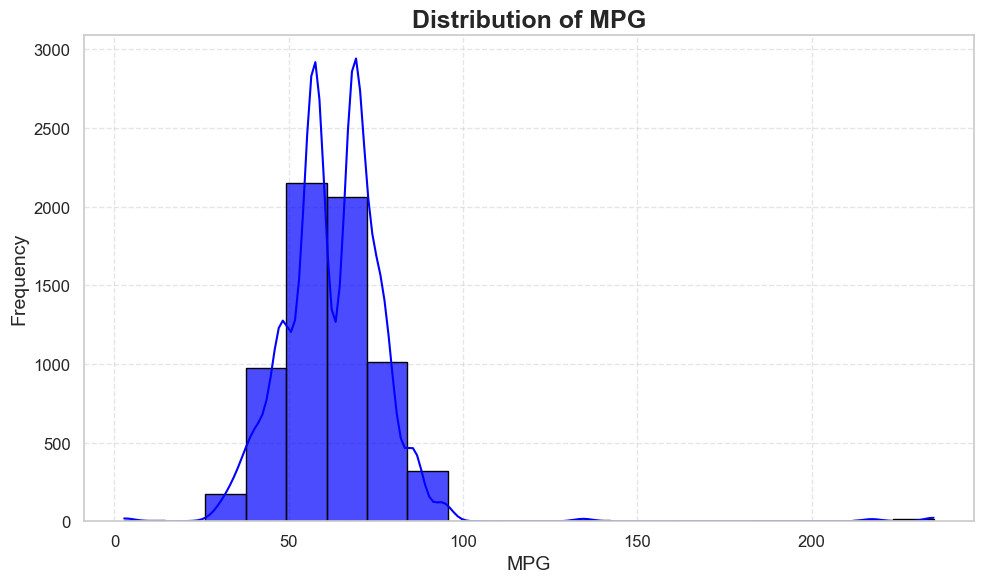

In [24]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram with KDE to visualize the distribution of miles per gallon (MPG)
sns.histplot(data=data, x='mpg', bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)

# Add a title with custom font size and weight
plt.title('Distribution of MPG', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('MPG', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Display the counts of each engine size
print(data['engineSize'].value_counts())

# Display the total count of engine sizes
total_engine_size_counts = data['engineSize'].value_counts().sum()
print('Total counts:', total_engine_size_counts)

engineSize
1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: count, dtype: int64
Total counts: 6738


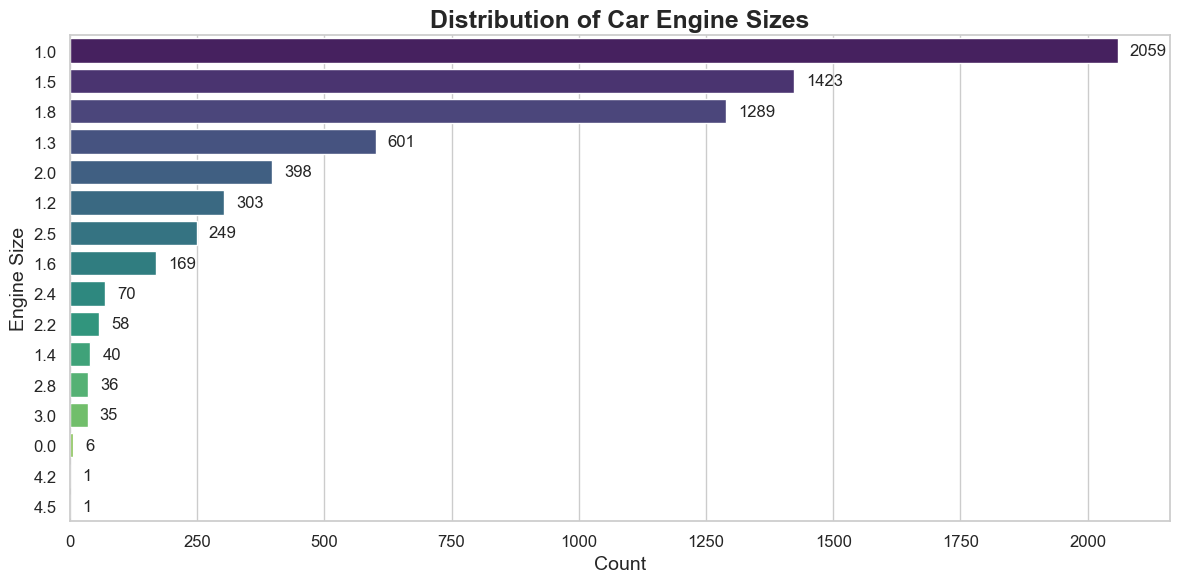

In [26]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a count plot to visualize the distribution of car engine sizes
ax = sns.countplot(data=data, y='engineSize', order=data['engineSize'].value_counts().index, palette='viridis')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_width() + 10, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

# Add a title with custom font size and weight
plt.title('Distribution of Car Engine Sizes', fontsize=18, fontweight='bold')

# Add labels to the x and y axes with custom font size
plt.xlabel('Count', fontsize=14)
plt.ylabel('Engine Size', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()

# Show the plot
plt.show()

<a id="phase-4-exploratory-data-analysis-eda"></a>

## Phase 4: Exploratory Data Analysis (EDA)

EDA provides insights into the dataset's characteristics and relationships between variables. Key EDA steps performed include:

1. **Summary Statistics:** Descriptive statistics were computed to understand central tendencies and spreads.

2. **Data Visualization:** Visualizations such as histograms and count plots were created to visualize the distribution of numerical and categorical variables.

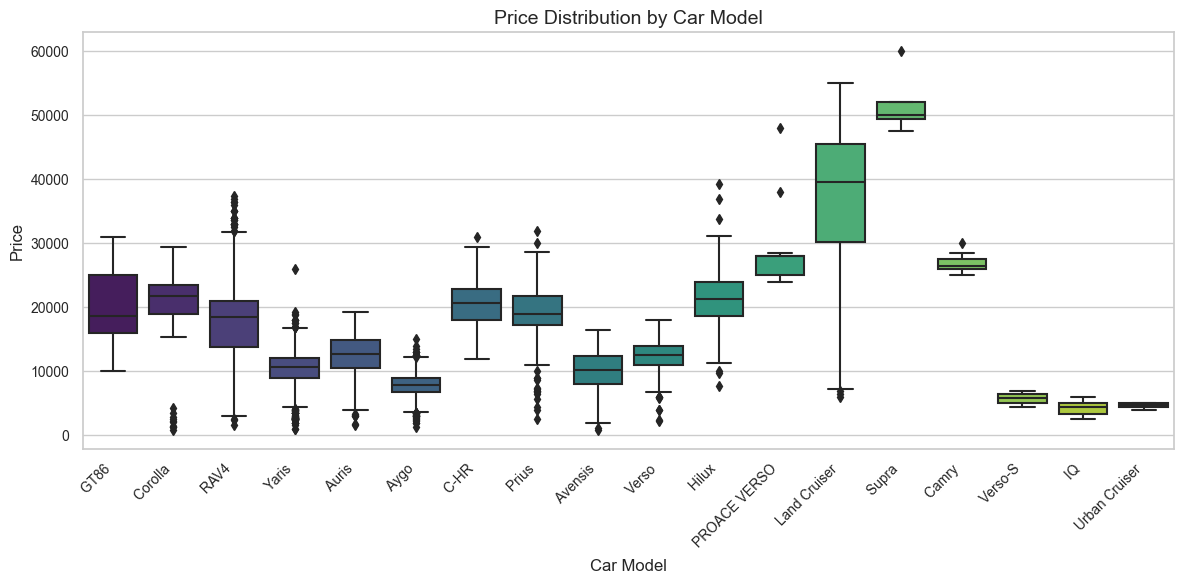

In [27]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a box plot to visualize the distribution of prices across different car models
sns.boxplot(data=data, x='model', y='price', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to the x and y axes with custom font size
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Add a title with custom font size
plt.title("Price Distribution by Car Model", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

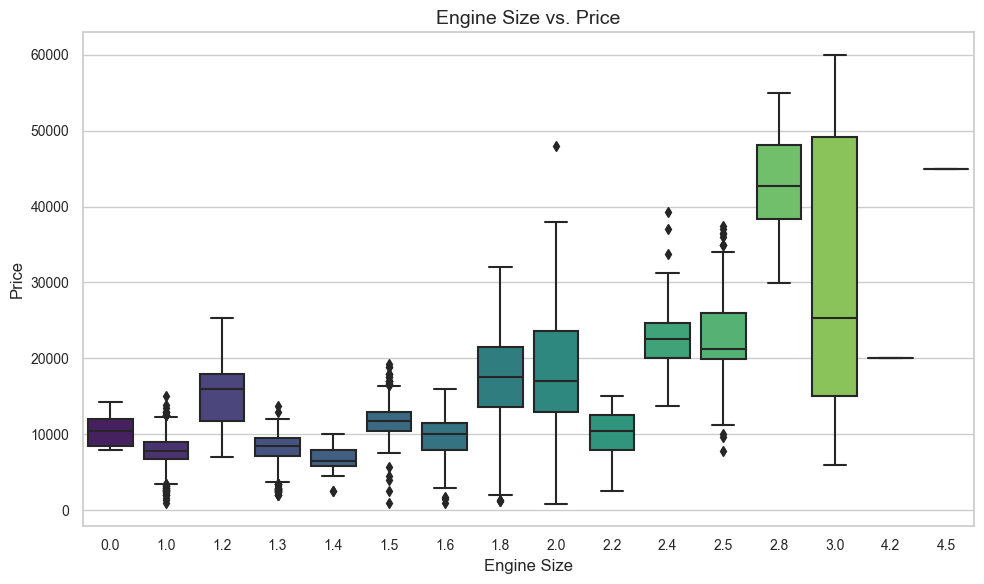

In [28]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to compare engine size vs. price
sns.boxplot(data=data, x='engineSize', y='price', palette='viridis')

# Add labels to the x and y axes with custom font size
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Add a title with custom font size
plt.title("Engine Size vs. Price", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

<a id="phase-5-feature-engineering"></a>

## Phase 5: Feature Engineering

Feature engineering involves creating new features or transforming existing ones to enhance the predictive power of models. In this project, the following feature engineering steps were undertaken:

1. **Categorical Encoding:** Categorical variables like 'model,' 'transmission,' and 'fuelType' were encoded using one-hot encoding to prepare them for model training.

2. **Feature Selection:** Selecting relevant features that contribute most to the target variable is important for model performance.

In [29]:
# Select the categorical columns
cars_cat = data[['model', 'transmission', 'fuelType']]

# Apply get_dummies separately to each column
model_dummies = pd.get_dummies(cars_cat['model'], prefix='model', drop_first=True)
transmission_dummies = pd.get_dummies(cars_cat['transmission'], prefix='transmission', drop_first=True)
fuelType_dummies = pd.get_dummies(cars_cat['fuelType'], prefix='fuelType', drop_first=True)

# Join the dummy dataframes together
cars_cat_dummies = pd.concat([model_dummies, transmission_dummies, fuelType_dummies], axis=1)


In [30]:
# Remove the 'model', 'transmission', and 'fuelType' columns from the data DataFrame
data = data.drop(['model', 'transmission', 'fuelType'], axis=1)

In [31]:
# Concatenate the data and cars_cat_dummies DataFrames along columns
data = pd.concat([data, cars_cat_dummies], axis=1)

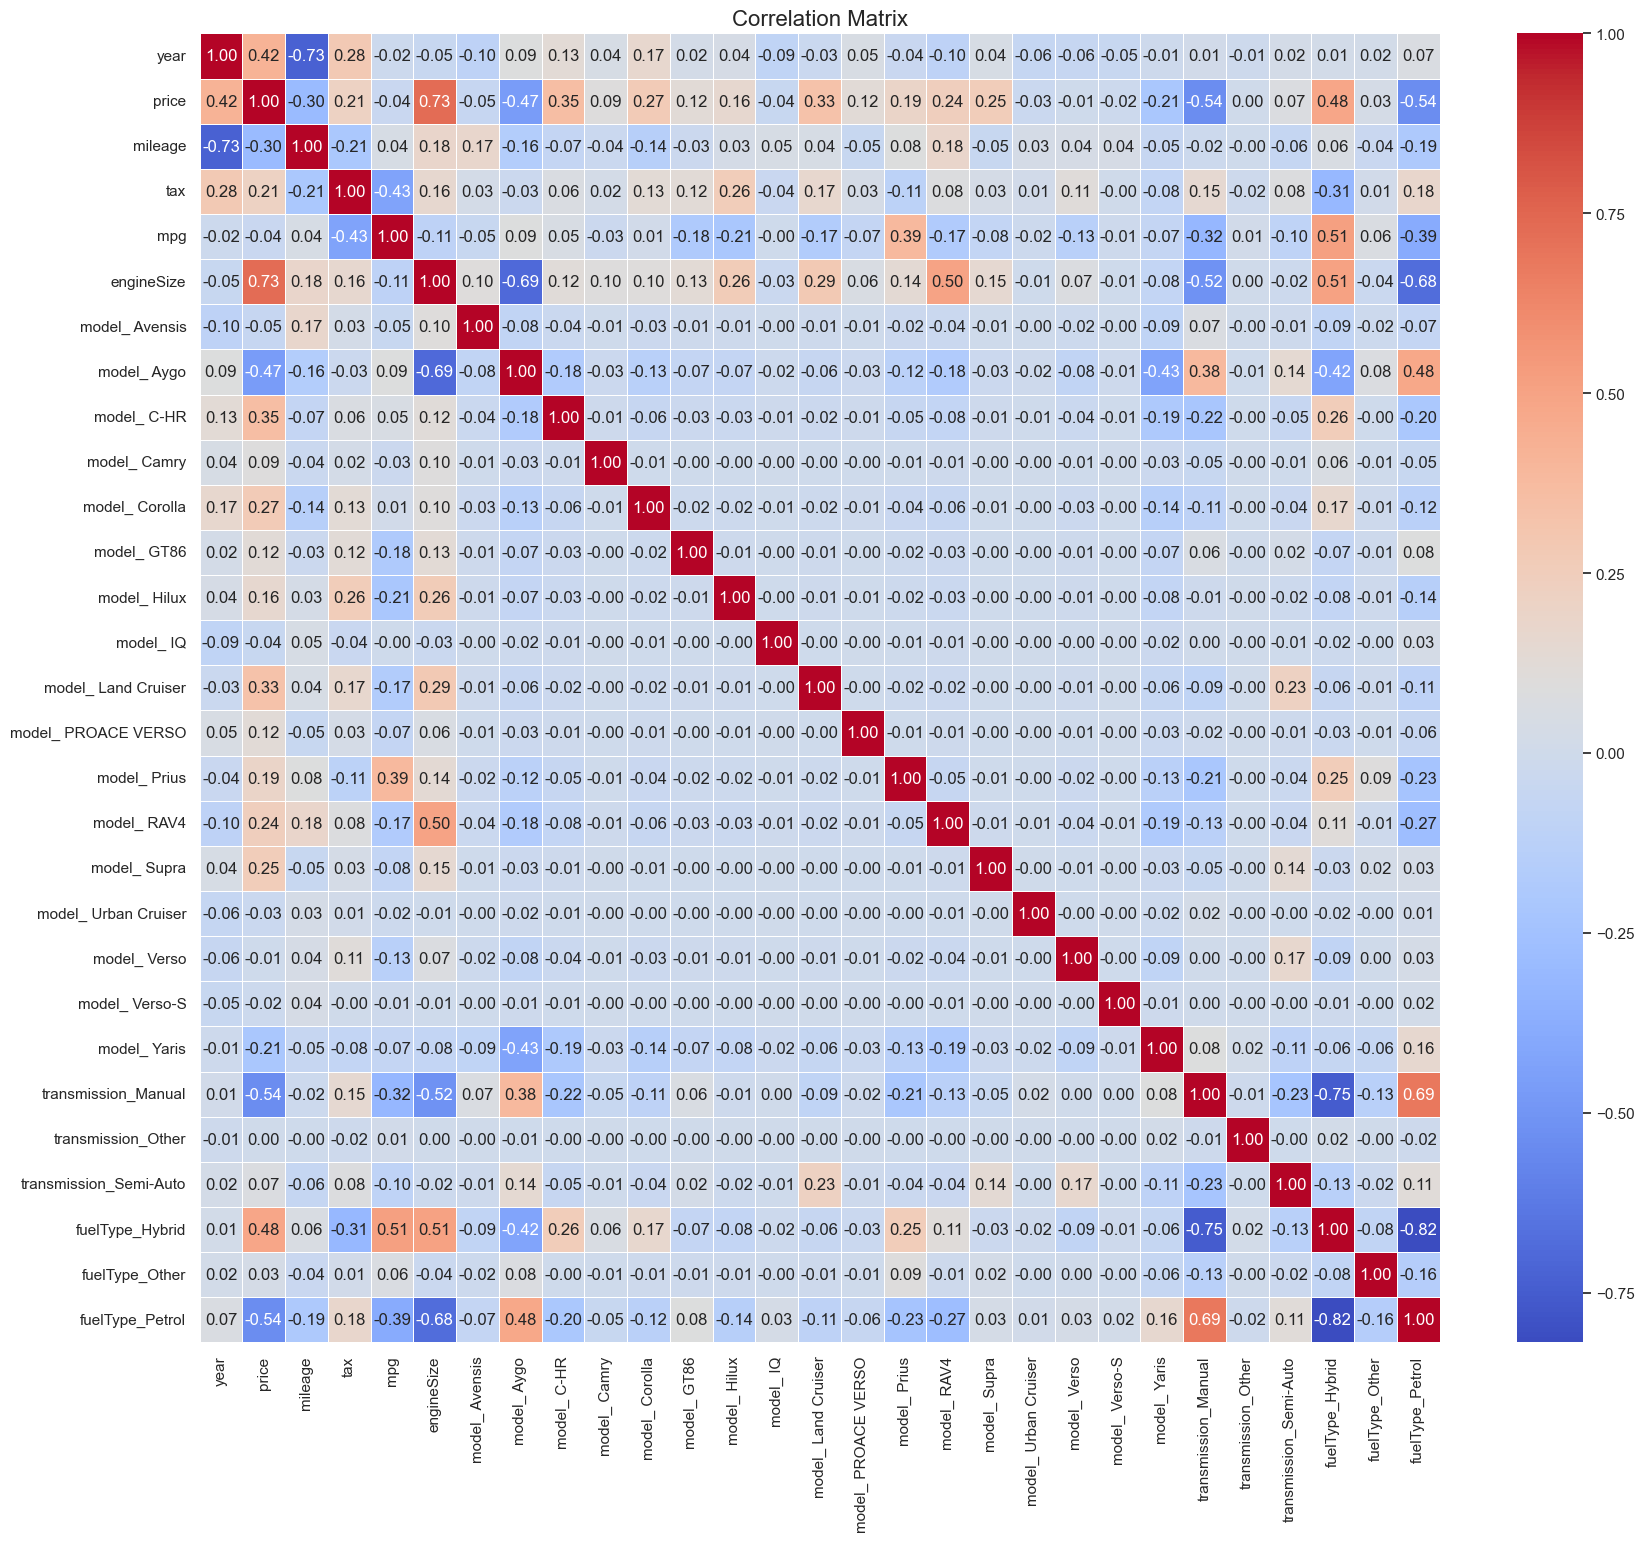

In [32]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set the Seaborn style
sns.set(style="white")

# Set the figure size for the plot
plt.figure(figsize=(20, 17))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title with custom font size
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

In [33]:
# Split the dataset into features (X) and target (y)
X = data.drop("price", axis=1)
y = data["price"]

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="phase-6-model-development"></a>

## Phase 6: Model Development

Multiple regression models were developed to predict car prices. These include:

1. **Random Forest Regression**
2. **Gradient Boosting Regression**
3. **Linear Regression**
4. **Support Vector Regression**
5. **XGBoost Regression**
6. **Lasso Regression**
7. **Decision Tree Regression**
8. **K-Nearest Neighbors Regression**

In [36]:
# Initialize and train models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()
svr_model = SVR()
xgb_model = XGBRegressor(random_state=42)
lasso_model = Lasso(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5) 

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

<a id="phase-7-model-evaluation"></a>

## Phase 7: Model Evaluation

Models were evaluated using the Mean Squared Error (MSE) metric. The lower the MSE, the better the model's predictive performance. Model evaluation steps include:

1. **Training and Testing Split:** Data was split into training and testing sets to evaluate model performance on unseen data.

2. **Standardization:** Numerical features were standardized to ensure consistent scales across features.

3. **Model Training:** Models were trained on the training set using the preprocessed and engineered features.

4. **MSE Calculation:** MSE was calculated for each model using predictions on the test set.

In [37]:
# Model Evaluation
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)
xgb_predictions = xgb_model.predict(X_test_scaled)
lasso_predictions = lasso_model.predict(X_test_scaled)
dt_predictions = dt_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate model performance using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print the results of the metrics
print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)
print("Linear Regression MSE:", lr_mse)
print("Support Vector Regression MSE:", svr_mse)
print("XGBoost MSE:", xgb_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Decision Tree Regression MSE:", dt_mse)
print("K-Nearest Neighbors Regression MSE:", knn_mse)


Random Forest MSE: 1481582.8863541489
Gradient Boosting MSE: 1518326.5489021947
Linear Regression MSE: 3126829.2198006185
Support Vector Regression MSE: 43098773.25843399
XGBoost MSE: 1387159.871841338
Lasso Regression MSE: 3126647.0459095924
Decision Tree Regression MSE: 2347421.012554608
K-Nearest Neighbors Regression MSE: 1836555.3614243323


<a id="phase-8-hyperparameter-tuning"></a>

## Phase 8: Hyperparameter Tuning

Hyperparameter tuning aims to optimize model performance by finding the best set of hyperparameters. Two techniques were used:

1. **Grid Search:** Used to tune hyperparameters for the XGBoost model, resulting in improved model performance.

2. **Randomized Search:** Used to tune hyperparameters for the Random Forest model.

In [38]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [39]:
%%capture
# Initialize the XGBoost model and perform grid search
xgb_model = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

In [40]:
# Print the best parameters and corresponding MSE score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Negative MSE:", grid_search_xgb.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Negative MSE: -1387665.5498544746


In [41]:
# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
%%capture
# Initialize the Random Forest model and perform randomized search
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=10,
                                      scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

In [43]:
# Print the best parameters and corresponding MSE score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Negative MSE:", random_search_rf.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Negative MSE: -1580834.844383818


<a id="phase-9-model-interpretation"></a>

## Phase 9: Model Interpretation

Model interpretation involves analyzing and visualizing model predictions and residuals. Key steps include:

1. **Scatter Plot:** A scatter plot of predicted prices vs. actual prices provides an intuitive view of model performance.

2. **Residual Plot:** A residual plot helps identify patterns or biases in predictions by visualizing the distribution of residuals.

In [44]:
xgb_test_predictions = grid_search_xgb.best_estimator_.predict(X_test_scaled)

xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

print("XGBoost Test MSE:", xgb_test_mse)
print("XGBoost Test MAE:", xgb_test_mae)
print("XGBoost Test R2:", xgb_test_r2)

XGBoost Test MSE: 1200870.5853721292
XGBoost Test MAE: 732.560582101522
XGBoost Test R2: 0.9717815812863811


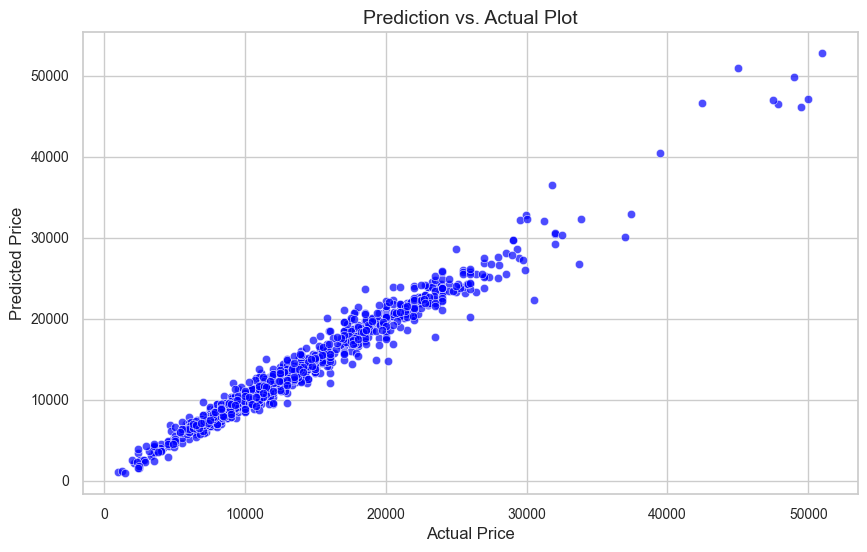

In [45]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize predicted prices vs. actual prices
sns.scatterplot(x=y_test, y=xgb_test_predictions, alpha=0.7, color='blue')

# Add labels to the x and y axes with custom font size
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)

# Add a title with custom font size
plt.title("Prediction vs. Actual Plot", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

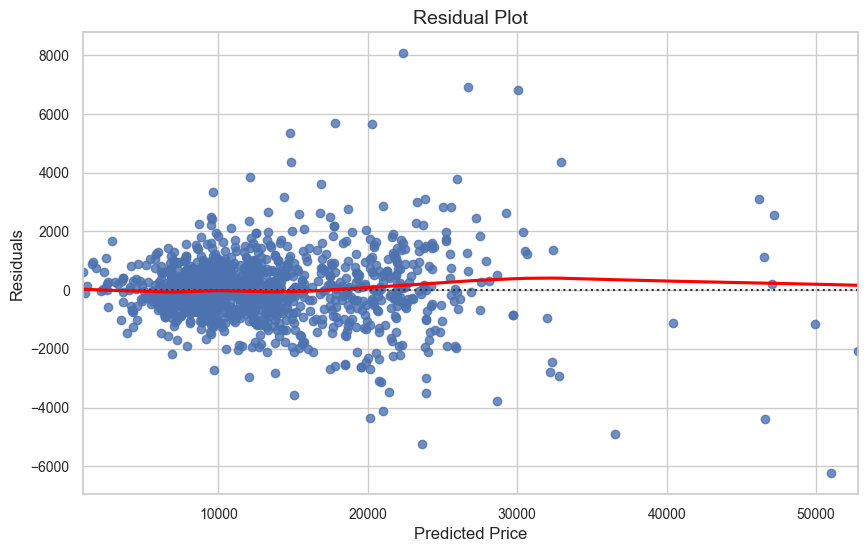

In [46]:
# Calculate residuals
residuals = y_test - xgb_test_predictions

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a residual plot
sns.residplot(x=xgb_test_predictions, y=residuals, lowess=True, line_kws={"color": "red"})

# Add labels to the x and y axes with custom font size
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Residuals", fontsize=12)

# Add a title with custom font size
plt.title("Residual Plot", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

In [47]:
# Calculate Percentage of Predictions within Range

# Calculate the percentage difference between predicted and actual prices
percentage_within_range = (abs(xgb_test_predictions - y_test) / y_test) * 100

# Calculate the percentage of predictions within 10% of actual price
percentage_within_10 = (sum(percentage_within_range <= 10) / len(percentage_within_range)) * 100

# Display the calculated percentage
print('Percentage of Predictions within 10% of Actual Price:', percentage_within_10)


Percentage of Predictions within 10% of Actual Price: 82.71513353115726


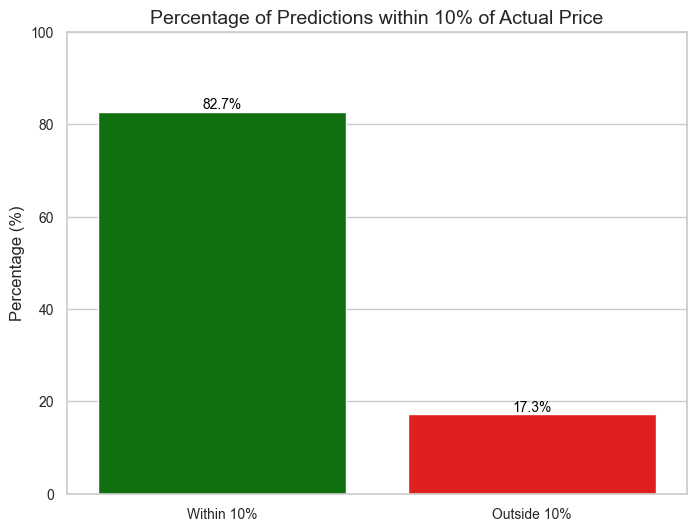

In [48]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot for percentage of predictions within and outside 10%
ax = sns.barplot(x=["Within 10%", "Outside 10%"], y=[percentage_within_10, 100 - percentage_within_10], palette=["green", "red"])

# Add labels to the x and y axes with custom font size
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Percentage of Predictions within 10% of Actual Price", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)

# Annotate the bars with labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

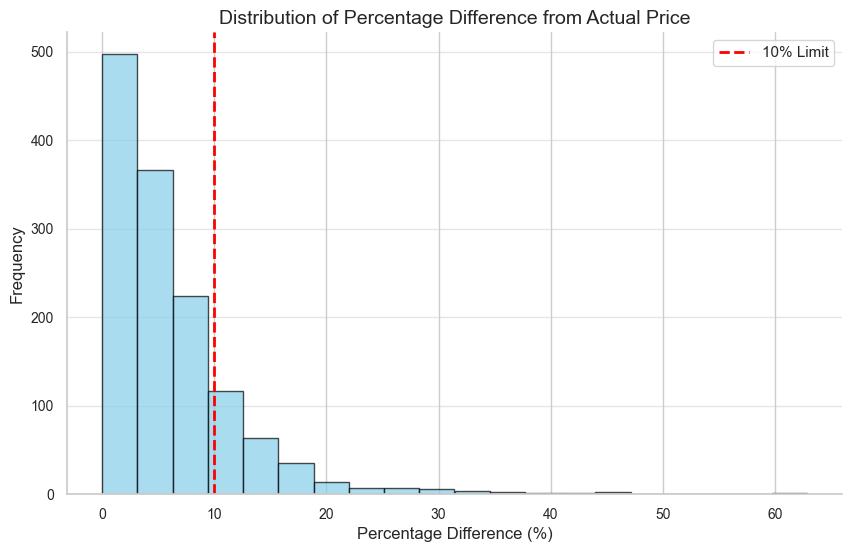

In [49]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of percentage differences
plt.hist(percentage_within_range, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add a dashed line indicating the 10% limit
plt.axvline(x=10, color='red', linestyle='dashed', linewidth=2, label='10% Limit')

# Add labels to the x and y axes with custom font size
plt.xlabel("Percentage Difference (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add a title with custom font size
plt.title("Distribution of Percentage Difference from Actual Price", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add legend, grid, and remove spines
plt.legend()
plt.grid(axis='y', alpha=0.5)
sns.despine()

# Show the plot
plt.show()

<a id="phase-10-model-persistence"></a>

## Phase 10: Model Persistence

Models were saved using the `joblib` library for future use. The trained XGBoost model with the best hyperparameters was saved and can be loaded when needed.

In [50]:
# Save the trained XGBoost model using Joblib

# Use the 'joblib.dump' function to save the trained XGBoost model ('grid_search_xgb') to a file named 'xgb_model.pkl'
joblib.dump(grid_search_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [51]:
# Load a trained model using Joblib

# Use the 'joblib.load' function to load a trained model from the file 'model_filename.pkl'
# Uncomment the last line of code to load the model-trained
# xgb_model = joblib.load('xgb_model.pkl')

<a id="final-summary-and-recommendations"></a>

## Final Summary and Recommendations

Based on the results and findings of the Car Price Prediction project, the following recommendations are suggested for the business:

Model Deployment: Deploy the trained XGBoost model for predicting car prices on the business's website or platform to assist potential buyers and sellers in estimating accurate car prices.

- Regular Data Updates: Ensure that the dataset used for prediction is regularly updated with new car listings to improve model accuracy and relevance.

- User-Friendly Interface: Develop an intuitive user interface that allows users to input car features easily and receive instant price predictions.

- Customer Education: Provide users with information on how the prediction model works, its accuracy, and the factors that influence car prices.

- Continuous Monitoring: Regularly monitor the model's performance and retrain it as necessary to adapt to changing market trends and customer preferences.

- Feedback Collection: Collect user feedback to identify any potential issues with model predictions and continuously improve the model's accuracy.

By implementing these recommendations, the business can enhance its user experience, provide valuable insights to customers, and improve its overall service quality.

<a id="conclusion"></a>

## Conclusion

The Car Price Prediction project follows a comprehensive approach from data collection to model development, evaluation, and interpretation. By employing various techniques, including data preprocessing, EDA, feature engineering, and hyperparameter tuning, the project aims to develop accurate machine learning models for predicting car prices.

---

---